<a href="https://colab.research.google.com/github/mckolu/DataScience/blob/main/2_DataScienceNotes_ML_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BASICS

In [ ]:
# Tesla T4
# !nvidia-smi
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-0a144f09-3b55-f4a4-5cd5-1691e32056c0)


In [ ]:
# DICTIONARIES
dict = {
    'student1': 'name lastname',
    'address': 'city'
}

dict['student1']

for key, value in dict.items():
  print ('key: ', key, '--- value: ', value)

key:  student1 --- value:  name lastname
key:  address --- value:  city


In [ ]:
# NUMPY
import numpy as np
np.zeros([2,5])
np.arange(1,11,4) # numbers between 1-10 skip 4 numbers each time
np.linspace(1,5,10) # put 10 numbers between 1-5 increasing linearly

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

# **PANDAS**

In [ ]:
# Importing data

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/1_intro/nyc_weather.csv')
df.head()

df['Temperature'].max()

50

In [ ]:
# Another way of creating a data frame is using dictionaries
weather_data = {
    'day': ['1/1/2017','1/2/2017','1/3/2017','1/4/2017','1/5/2017','1/6/2017'],
    'temperature': [32,35,28,24,32,31],
    'windspeed': [6,7,2,7,4,2],
    'event': ['Rain', 'Sunny', 'Snow','Snow','Rain', 'Sunny']
}

df = pd.DataFrame(weather_data)
df.describe()

,temperature,windspeed
count,6.000000,6.000000
mean,30.333333,4.666667
std,3.829708,2.338090
min,24.000000,2.000000
25%,28.750000,2.500000
50%,31.500000,5.000000
75%,32.000000,6.750000
max,35.000000,7.000000


In [ ]:
# Another way of creating a data frame is using a list of dictionaries
weather_data2 = [
    {'day': '1/1/2017', 'temperature': 32, 'windspeed': 6, 'event': 'Rain'},
    {'day': '1/2/2017', 'temperature': 35, 'windspeed': 7, 'event': 'Sunny'},
    {'day': '1/3/2017', 'temperature': 28, 'windspeed': 2, 'event': 'Snow'},   
]

df2 = pd.DataFrame(data=weather_data, columns=['day','temperature','windspeed','event'])

In [ ]:
# Check the number of rows and columns
rows, columns = df.shape
rows

6

In [ ]:
# SLICING
df.head(2) # first two rows
df.tail(2) # last two rows
df[3:6] # rows 3-5

df.columns # list column names
df['day'] # day column with all rows. You can also use df.day


0    1/1/2017
1    1/2/2017
2    1/3/2017
3    1/4/2017
4    1/5/2017
5    1/6/2017
Name: day, dtype: object

In [ ]:
# Multiple brackets if you want to show multiple columns
df [['day', 'event']]

,day,event
0,1/1/2017,Rain
1,1/2/2017,Sunny
2,1/3/2017,Snow
3,1/4/2017,Snow
4,1/5/2017,Rain
5,1/6/2017,Sunny


In [ ]:
df['temperature'].max()

,city,temperature
7,mumbai,92


In [ ]:
# IMPORTAT: Conditional selection of data

# df[]df [] --- first df is for the data we want to show. The second df is for the condition.

df[df.temperature>=32] # all the rows where temperature is greater than 32
df[df.temperature==df['temperature'].max()] # all the rows where the temperature is max
df['day'][df.temperature==df['temperature'].max()] # the day where the temperature is max
df[['day','temperature']][df.temperature==df['temperature'].max()] # the day and the temperature where the temperature is max






,day,temperature
1,1/2/2017,35


In [ ]:
# INDEX

df.index #(it is like key id)

df.set_index('event', inplace=True) # You can set the index to something else 
# df.reset_index(inplace=True) # To revert the previous change and reset the index

# After setting the index, we can use the loc function. loc is label-based and iloc is integer position-based
df.loc['Rain']


,day,temperature,windspeed
event,,,
Rain,1/1/2017,32,6
Rain,1/5/2017,32,4


# **PANDAS - Reading CSV Files**


In [ ]:
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

# Skip the first row
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/1_intro/nyc_weather.csv', skiprows=1)

# Make the first row the header the first row. You can change header no if needed.
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/1_intro/nyc_weather.csv', header=0)

# If there is no headers in the CSV file, put header=none and add names=['column1 title', 'column2 title'..]
df1 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/1_intro/nyc_weather.csv', header=None, names=['aa', 'bb'])


In [ ]:
# Read only the first 3rows
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/1_intro/nyc_weather.csv', nrows=3)

In [ ]:
# Finding the null & broken values and replacing them with NaN. Use na_values=['not available', 'n.a.']

df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/4_read_write_to_excel/stock_data.csv', na_values=['not available', 'n.a.'])

# A column specific approach would be as following:

df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/pandas/4_read_write_to_excel/stock_data.csv",  na_values={
        'eps': ['not available'],
        'revenue': [-1],
        'people': ['not available','n.a.']
    })


In [ ]:
# Convert a column to a datatype: parse_dates=['day']
df2 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv', parse_dates=['day'])
# type(df.day[0])

# **PANDAS - Handling Missing Data**

### fillna, dropna, interpolate, replace





In [ ]:
# fillna

df2 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv', parse_dates=['day'])

# convert NaN to 0
df_new1 = df2.fillna(0) 

# convert NaN with the value in the previous row. method="bfill" uses the next row value
new_df2 = df.fillna(method="ffill") 

# or use a dictionary to manage each column
df_new3 = df.fillna({
        'temperature': 0,
        'windspeed': 0,
        'event': 'No Event'
    })


In [ ]:
# interpolate 

# (use the average of the previous and next rows and replace NaN)
new_df4 = df2.set_index('day')

new_df5 = new_df4.interpolate()

new_df6 = new_df4.interpolate(method='time') # method is a parameter to decide how to interpolate
new_df6


,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [ ]:
# dropna
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv', parse_dates=['day'])

# Drop all the rows with an NaN value
df1 = df.dropna()

# Drop if the values in all columns are NaN 
df2 = df.dropna(how='all')

# Keep the row if there is at least one valid value
df2 = df.dropna(thresh=1)

In [ ]:
# replace

df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/6_handling_missing_data_replace/weather_data.csv')

# change all the values in the df
df1 = df.replace([-99999, 28.0],np.NaN)

# Specify the columns and the values
df2 = df.replace({
        'temperature': -99999,
        'windspeed': -99999,
        'event': '0'
    }, np.nan)


# Multiple replace at the same time

df3 = df.replace({
        -99999: np.nan,
        '0': 'Sunny',
    })


# If there is somes string characters after a number, remove it. Like 32F to 32.
df4 = df.replace({
    'temperature': '[A-Za-z]', 
    'windspeed': '[a-z]'
    },'', regex=True) 


# Replacing list with another list

df_new = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})

df_new.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4])



,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


# Group By 
### Split Apply Combine

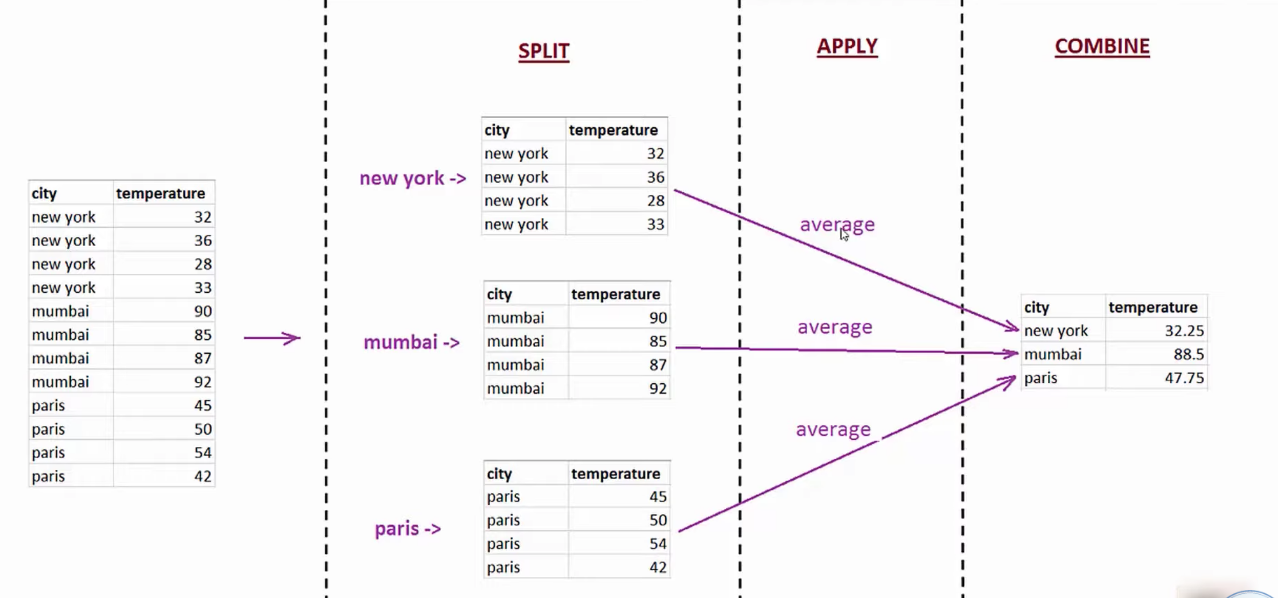

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/7_group_by/weather_by_cities.csv')

g = df.groupby('city') # g is an object with keys and values. key is the city and the values would be the related data

# for city, city_df in g:
#   print (city_df)

g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [ ]:
# g.max() 
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [ ]:
# new_df.reset_index(inplace=True)
new_df = g[['temperature']].mean() # The first two rows

new_df





,temperature
city,
mumbai,88.50
new york,32.25
paris,47.75


# Draft

In [ ]:
data_df = pd